---

Name: Gordon Yuan

Date: 4/12/25

Description: College Basketball Analysis

---

This text cell reads in the college basketball CSV table (https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset/data). The table contains information on each team with advanced statistics for each year starting at 2013 to 2024. I wanted to use and analyze this dataset because I am a big basketball fan but do not watch college basketball often. Hopefully, with this dataset, I can fill in the gaps of my knowledge in college basketball.


Some questions I want to answer:
*   Is a higher offensive efficiency (ADJOE) correlated with more wins?
*   Which team had the best balance of offense and defense?
*   Which conference has the highest average win percentage?
*    Has three-pointer make percentage and two-pointer make percentage  increased from 2013 to 2024?
*   Among the worst teams, which have the highest turnover rates?
*   Is there a significant difference in 3-point percentage between winning and losing teams?

---




In [ ]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

---

I will not be dropping any columns since they are all important values which will help with my analysis of the dataset. I will also not rename the column names, as the abbreviated columns would be too long

---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gordon Yuan - cbb.csv to Gordon Yuan - cbb.csv


In [ ]:
cbb = Table.read_table("Gordon Yuan - cbb.csv")
cbb.show(10)

TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1,2016
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1,2015
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14,19.5,25.5,24.9,30.7,30,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018
Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7,2ND,3,2019
Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30,26.2,39,26.9,56.3,40,38.2,29,71.5,7.7,2ND,1,2017
Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46,18.1,16.1,42,29.7,51.8,36.8,50,44.9,33.2,32.2,65.9,3.9,2ND,8,2014
Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48,14.6,18.7,32.5,29.4,28.4,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4,2013
Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,18.6,35.8,30.2,39.8,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1,2015
Virginia,ACC,38,35,123,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1,2019
North Carolina,ACC,39,33,121,91.5,0.9615,51.7,48.1,16.2,18.6,41.3,25,34.3,31.6,51,46.3,35.5,33.9,72.8,8.4,Champions,1,2017


---

Question 1: Is a higher offensive efficiency (ADJOE) correlated with more wins? Adjusted offensive efficiency is defined as an estimate of the offensive efficiency (points scored per 100 possessions).


Correlation:  0.734515522445


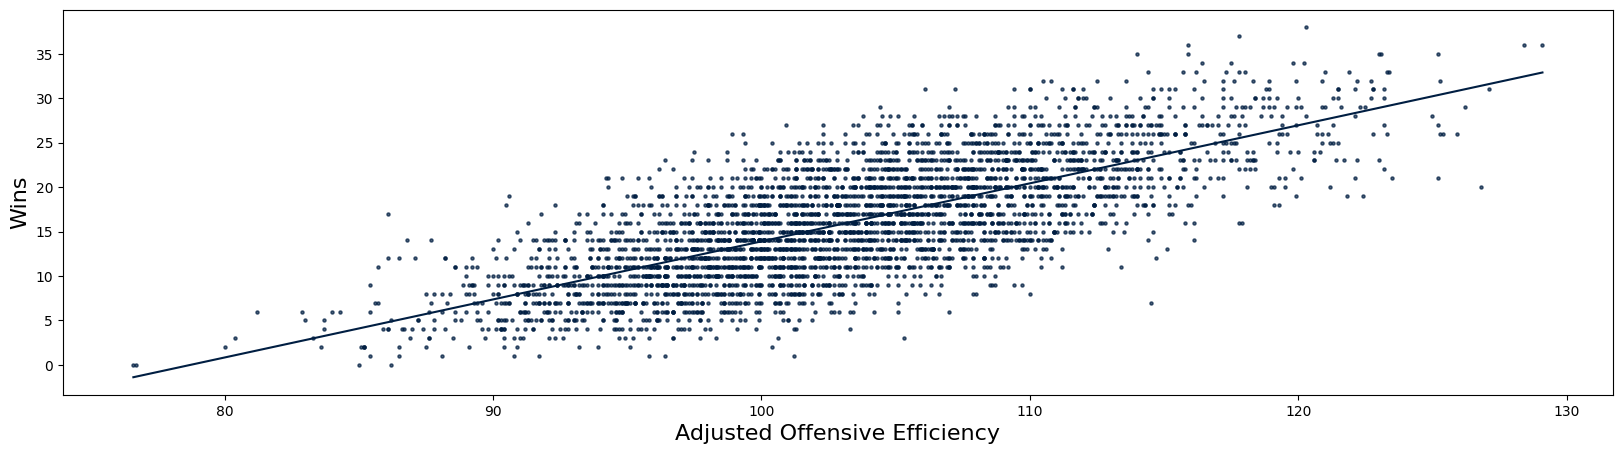

In [ ]:
# Create a new table with just the two necessary columns
adjoe_w_table = cbb.select("ADJOE", "W")
adjoe_w_scatter = adjoe_w_table.scatter(0, 1, fit_line= True, width = 20, s = 5)
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Wins")


# Calculate the mean wins and ADJOE

mean_wins = np.mean(adjoe_w_table.column("W"))
mean_adjoe = np.mean(adjoe_w_table.column("ADJOE"))

wins_stats = make_array()
adjoe_stats = make_array()

# For each team, subtract wins and mean wins, subtract adjoe and mean adjoe

for i in np.arange(cbb.num_rows):
  wins_difference = cbb.column("W").item(i) - mean_wins
  wins_stats = np.append(wins_stats, wins_difference)
  adjoe_difference = cbb.column("ADJOE").item(i) - mean_adjoe
  adjoe_stats = np.append(adjoe_stats, adjoe_difference)

# Calculate the correlation by dividing product of mean of win statistics and ADJOE staistics and the product of standard deviation of win statistics and ADJOE statistics

correlation = np.mean(wins_stats * adjoe_stats) / (np.std(wins_stats) * np.std(adjoe_stats))
print("Correlation: ", correlation)


Conclusion: There is a clear positive correlation between offensive efficiency and wins given by the table as we can see as ADJOE increases, wins increase. Also, the correlation is 0.735 which indicates a strong, positive association.

---

Question 2: Which team had the best balance of offense and defense?



In [ ]:
# First, find the teams in the top 75th percentile of ADJOE AND ADJDE

adjoe_top_percentile = cbb.sort("ADJOE", descending = True).take(np.arange(int(cbb.num_rows / 4)))
adjde_top_percentile = cbb.sort("ADJDE", descending = True).take(np.arange(int(cbb.num_rows / 4)))

# Loop through both tables to see which teams are in both tables

top_teams = make_array()

for i in np.arange(adjoe_top_percentile.num_rows):
  if adjoe_top_percentile.take(i).column("TEAM") == adjde_top_percentile.take(i).column("TEAM"):
    team = adjoe_top_percentile.take(i).column("TEAM")
    top_teams = np.append(top_teams, team)

# Show which teams have the bets balance of offense and defense

print("Teams in top 75th percentile of ADJOE and ADJDE:", top_teams)

cbb.where("TEAM", are.equal_to("Eastern Kentucky")).show(11)

Teams in top 75th percentile of ADJOE and ADJDE: ['Eastern Kentucky']


TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
Eastern Kentucky,OVC,31,19,103.4,101.8,0.5439,53.9,53.5,17.9,26.9,21.6,34.8,32.2,35,54.9,49.9,35.1,39.2,64,-5.5,nan,nan,2015
Eastern Kentucky,OVC,30,14,105.7,109.2,0.4067,56,53.1,20.3,20.3,27,34.2,40.3,42.3,54.2,51.3,39.5,37.6,73.2,-10.5,nan,nan,2016
Eastern Kentucky,OVC,29,12,98.2,106.4,0.2844,49.4,51.4,19.8,19.2,25.2,32.9,37.4,40.5,50.1,49.8,32.3,36.2,69.1,-13.3,nan,nan,2017
Eastern Kentucky,OVC,29,11,101.1,112.2,0.2315,49.8,55.3,19.1,19.1,27.1,31.9,33.4,35,48.2,52.9,35.1,39.8,69.4,-14.3,nan,nan,2018
Eastern Kentucky,OVC,29,13,98.7,105.1,0.3282,47.8,53.2,18.2,21.5,27.3,31.1,32.6,39.7,47.7,54.4,32,34,78.6,-11.3,nan,nan,2019
Eastern Kentucky,OVC,33,23,108.4,103.7,0.6242,54,51.2,17.9,25.5,27.9,38,34.8,43.7,55.4,53.3,35,31.5,65.1,-4,nan,nan,2013
Eastern Kentucky,OVC,32,22,112.1,107.5,0.6177,56.7,55.7,15.8,24.2,23,34,43.2,54.9,55.7,56.7,38.6,35.8,66,-3.3,R64,15,2014
Eastern Kentucky,OVC,27,22,101.5,102.3,0.4749,51.2,51,16.6,24.3,26.8,30.2,25.6,32.2,49.6,51.8,35.8,33,75.1,-3.8,nan,nan,2021
Eastern Kentucky,ASun,27,13,100.8,108.3,0.3055,48.4,54.6,15.6,22.3,28.7,31.8,21.7,28.1,46,56.6,33.9,34.4,71,-13.7,nan,nan,2022
Eastern Kentucky,ASun,34,23,104.4,102.8,0.5437,48.6,50.6,16.7,18.6,33.4,29.3,24.3,25.4,48.6,49.7,32.4,34.7,69.8,-6.3,nan,nan,2023


The only team in the top 75th percentile of offensive and defensive efficiency is Eastern Kentucky. Upon further investigation, historically, they have been very balanced, typically averaging above 100 in both ADJOE and ADJDE.

---


Question 3: Which conference has the highest average win percentage?



In [ ]:
# Calculate the win percentage of each team

win_percentage = cbb.column("W") / cbb.column("G")

# Create a new table with the win percentages and group by conference and mean

cbb_with_win_percentage = cbb.with_columns("WIN PERCENTAGE", win_percentage)
cbb_with_win_percentage = cbb_with_win_percentage.group("CONF", np.mean)

# Sort win percentage by descending to get top teams

cbb_with_win_percentage.sort("WIN PERCENTAGE mean", descending = True).take(np.arange(5))

CONF,TEAM mean,G mean,W mean,ADJOE mean,ADJDE mean,BARTHAG mean,EFG_O mean,EFG_D mean,TOR mean,TORD mean,ORB mean,DRB mean,FTR mean,FTRD mean,2P_O mean,2P_D mean,3P_O mean,3P_D mean,ADJ_T mean,WAB mean,POSTSEASON mean,SEED mean,YEAR mean,WIN PERCENTAGE mean
B12,,33.3246,20.5351,112.061,95.1877,0.840584,50.9114,48.3579,18.2991,19.6035,32.2518,29.9307,35.3974,33.9737,50.3386,47.4684,34.6553,33.336,67.6965,1.63825,,nan,2018.56,0.610514
B10,,33.2733,19.8533,111.396,96.11,0.816253,50.832,48.302,17.0167,17.6753,30.1533,28.3553,33.5127,31.0327,50.0333,47.1533,34.808,33.6453,66.978,0.3612,,nan,2018.49,0.590334
BE,,32.7815,19.4706,110.931,96.8395,0.794939,51.0387,48.9664,17.821,18.5824,30.4714,29.2361,34.1798,32.2765,50.6076,48.1303,34.5546,33.6462,67.7832,-0.182185,,nan,2018.28,0.586764
Ind,,29,17,103.3,104.5,0.4644,52.3,46.4,20.5,19,28.8,33.8,39,44.1,49.8,44.6,37.1,33.1,67.1,-6.2,,nan,2015,0.586207
ACC,,33,19.5988,111.19,97.321,0.78682,51.0988,48.9432,17.2321,17.9321,30.5772,29.042,33.558,30.6074,50.4216,48.0525,34.8568,33.6642,67.1549,-0.538025,,nan,2018.46,0.585937


The top five conferences in terms of win percentage are the Big 12, Big 10, Big East, Independent Schools (doesn't belong to a conference), and ACC. This is interesting because some of the biggest teams in college basketball are in these conferences. The University of Houston is in the Big 12 conference and they recently made the March Madness final but ultimately choked the game and lost.

---

Question 4: Has three-pointer make percentage and two-pointer make percentage increased from 2013 to 2024?

Difference in three-pointer percentage: -0.015643956883785393
Difference in two-pointer percentage: 2.8538578502396277


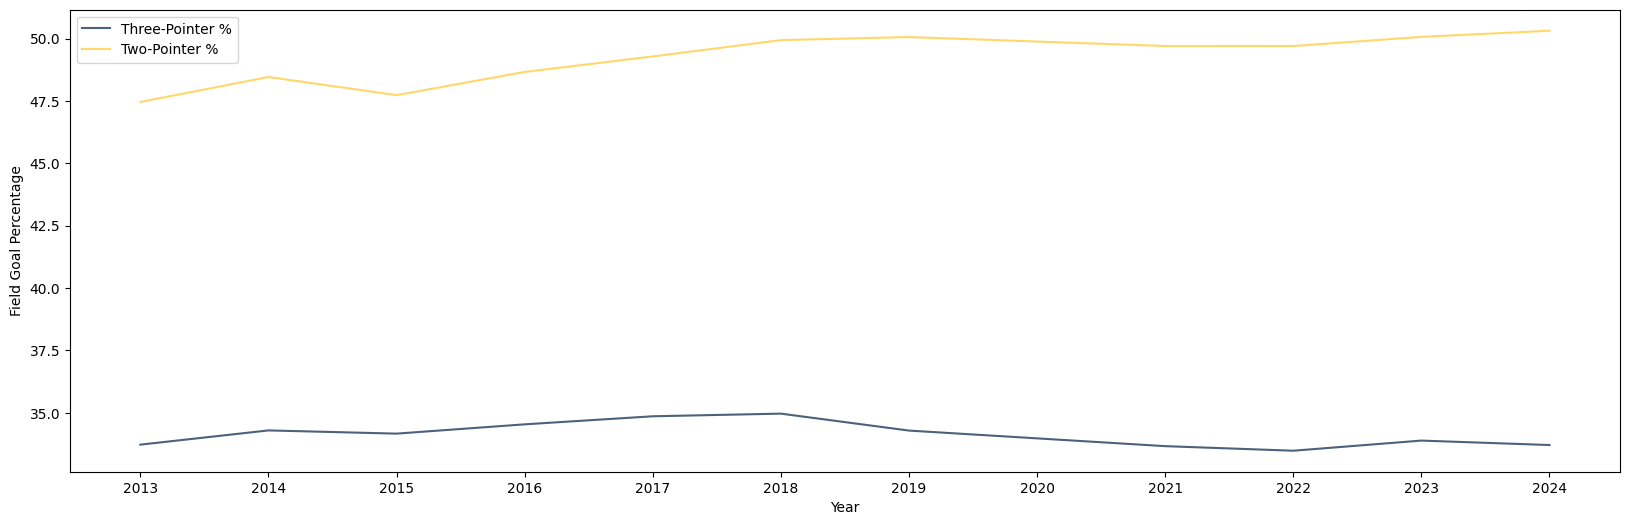

In [ ]:
# Create a new table that sorts by year and group by year and mean

cbb_sorted_by_year = cbb.sort("YEAR", descending = False).select("TEAM", "3P_O", "2P_O", "YEAR").group("YEAR", np.mean).drop(1)

# Use a line plot to display the change in percentages from 2013-2024

cbb_sorted_by_year.plot("YEAR", width = 20)
plt.xlabel("Year")
plt.ylabel("Field Goal Percentage")
plt.legend(["Three-Pointer %", "Two-Pointer %"])
plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
# Calculate difference in percentages from 2013 and 2024

three_pointer_percent_difference = cbb_sorted_by_year.column(1).item(cbb_sorted_by_year.num_rows - 1) - cbb_sorted_by_year.column(1).item(0)
two_pointer_percent_difference = cbb_sorted_by_year.column(2).item(cbb_sorted_by_year.num_rows - 1) - cbb_sorted_by_year.column(2).item(0)

print("Difference in three-pointer percentage:", three_pointer_percent_difference)
print("Difference in two-pointer percentage:",two_pointer_percent_difference)

From the line plot, the two-pointer percentage has actually increased while the three-pointer percentage seems to have stayed the same or slightly decreased. After doing more calculations, the mean difference in three-pointer percentage has decreased by about 0.02 but has increased for two-pointer percentage by 2.85. I found this data intriguing since the three-pointer has become the most important shot in the NBA, so percentage has increased in the professional league. Perhaps the increase in two-pointer percentage is due to the emphasis on centers in college.

---

Question 5: Among the worst teams, which have the highest turnover rates?

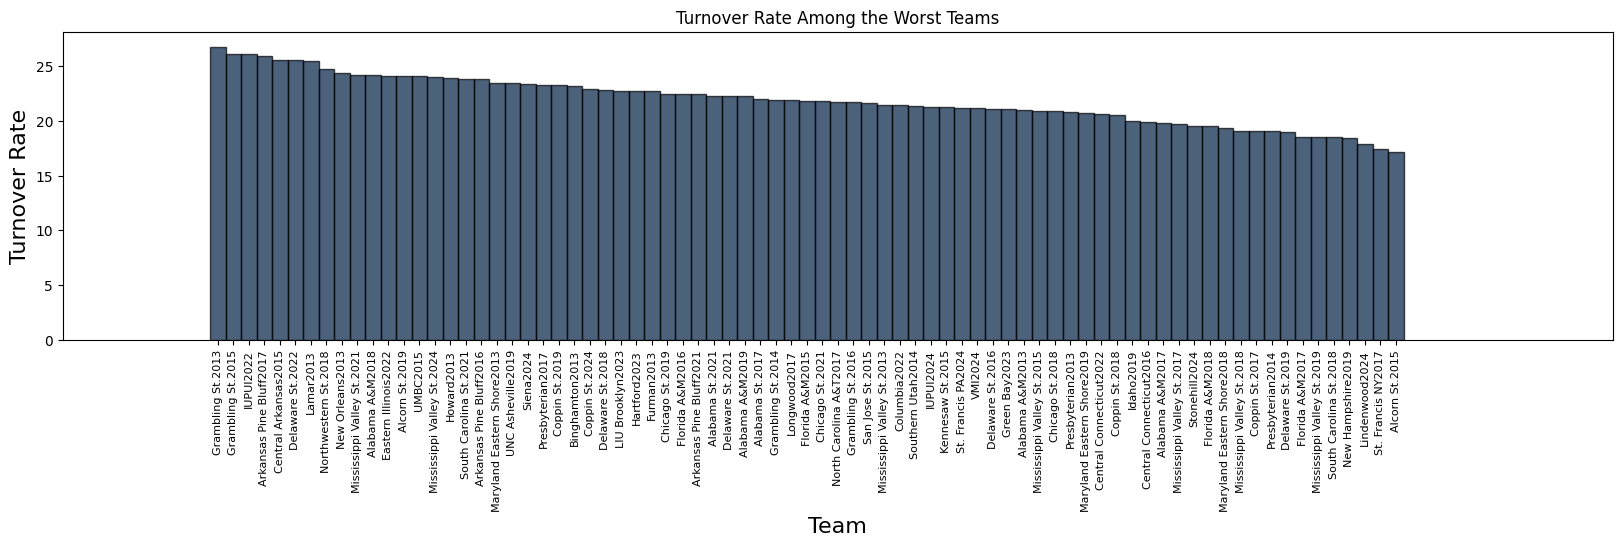

In [ ]:
# Sort by BARTHAG (Chance of beating average D1 team) from worst to best

worst_teams = cbb.sort("BARTHAG", descending=False)

# Take bottom 5%

bottom_percentile = worst_teams.take(np.arange(int(cbb.num_rows / 50)))

# Sort bottom teams by highest turnover rate
high_tor_teams = bottom_percentile.sort("TOR", descending=True)

# Add a column that states the team and year so teams are differentiated by year

team_and_year_arr = make_array()

for i in np.arange(high_tor_teams.num_rows):
  team_and_year = high_tor_teams.column("TEAM").take(i) + str(high_tor_teams.column("YEAR").take(i))
  team_and_year_arr = np.append(team_and_year_arr, team_and_year)

high_tor_teams = high_tor_teams.with_columns("TEAM AND YEAR", team_and_year_arr)

# Plot turnover rates of those bottom teams

high_tor_teams.bar("TEAM", "TOR", width=20)
plt.xlabel("Team")
plt.ylabel("Turnover Rate")
plt.title("Turnover Rate Among the Worst Teams")
plt.xticks(
    ticks=np.arange(high_tor_teams.num_rows),
    labels=high_tor_teams.column("TEAM AND YEAR"),
    rotation=90,
    fontsize=8
);

The worst teams are defined by their power ranking, or BARTHAG in the table. Among the worst teams, those with the highest turnover rates are Grambling State, IUPUI, and other very small D1 schools. The worst teams seem to be small state schools that likely have little funding, which makes sense why their basketball programs are so poor.

---

Question 6: Is there a significant difference in three-pointer make percentage between winning and losing teams?


*   Null Hypothesis: There is no difference in three-pointer make percentage between winning and losing teams.
*   Alternative Hypothesis: There is a difference in three-pointer make percentage between winning losing teams.
*   P-value cutoff: 1% or 0.01



P-value:  0.0


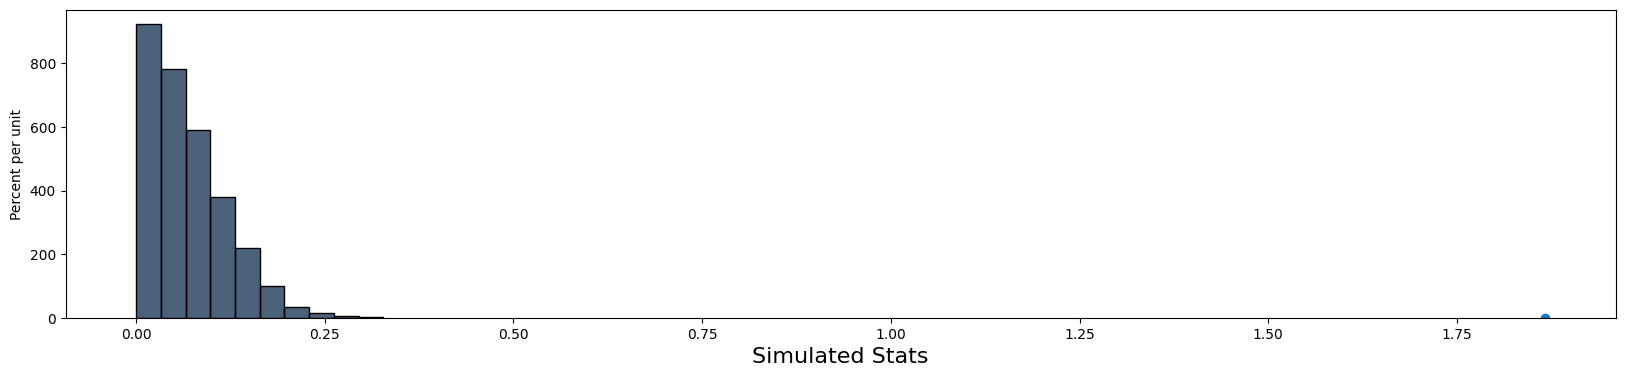

In [ ]:
# Create a new table that includes a column with win_percentage

tbl_win_percentage = cbb.with_columns("Win Percentage", win_percentage)

winning_or_losing = make_array()

# Loop through the table to determine which teams have a losing record

for i in np.arange(cbb.num_rows):
  if tbl_win_percentage.column("Win Percentage").take(i) > .5:
    winning_or_losing = np.append(winning_or_losing, "Winning Record")

  else:
    winning_or_losing = np.append(winning_or_losing, "Losing Record")

# Reassign the table to itself with another column called Record

tbl_win_percentage = tbl_win_percentage.with_columns("Record", winning_or_losing)
record_grouped = tbl_win_percentage.group("Record", np.mean)

# Calculate the observed stat by subtracting the mean three-pointer make percentage of winning and losing teams

observed_stat = abs(record_grouped.column("3P_O mean").item(1) - record_grouped.column("3P_O mean").item(0))

# Create a simulation function to shuffle the Record column

def simulation(tbl):
  sim = tbl.sample(with_replacement = False).column("Record")
  new_tbl = tbl.select("3P_O").with_columns("Shuffled Record", sim)
  grouped = new_tbl.group("Shuffled Record", np.mean)
  return abs(float(grouped.column("3P_O mean").item(1) - grouped.column("3P_O mean").item(0)))

simulated_stats = make_array()

# Simulation 5000 times

for i in np.arange(5000):
  stat = simulation(tbl_win_percentage)
  simulated_stats = np.append(simulated_stats, stat)

# Calculate p-value

p_value = abs(np.count_nonzero(simulated_stats >= observed_stat) / len(simulated_stats))
print("P-value: ", p_value)

Table().with_column("Simulated Stats", simulated_stats).hist(width = 20);
plt.scatter(observed_stat, 0);





Since the p-value is 0, it means that there is absolutely no chance that the observed statistic is due to randmom chance. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in three-pointer make percentage between winning teams and losing teams. This means, winning teams tend to make three-pointers at a greater rate than losing teams.

---

Question 7: Among the teams that make at least the Elite Eight in the March Madness tournament, which teams are statistically the worst in free throw rate. Essentially, which teams that make it far in the tournament are the most ethical in terms of scoring?

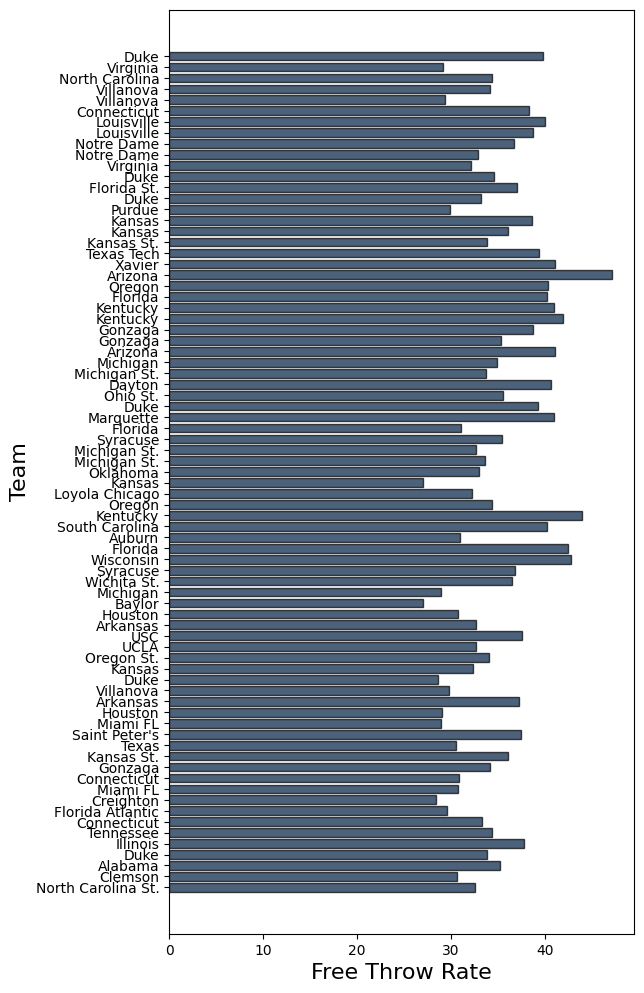

In [ ]:
at_least_elite_eight = cbb.where("POSTSEASON", are.contained_in(["E8", "F4", "Champions", "2nd"]))
at_least_elite_eight.sort("FTR", descending = True)
at_least_elite_eight.barh("TEAM", "FTR", height = 12)
plt.xlabel("Free Throw Rate");
plt.ylabel("Team");

The most ethical teams in terms of free throw rate are

---

Conclusion: Overall, I would say that the data and findings I observed were very intriguing. One answer that I found kind of crazy was that three-pointer make percentage lowered over an 11 year span. With the evolution of the modern basketball game and the influence of Stephen Curry, I would have expected the three-pointer make percentage to increase rather than decrease. Some findings were also expected such as the association between offensive efficiency and wins since being great at offense translates to more points. I enjoyed using new skills such as A/B testing as it allowed me to work on this new technique and get used to it.

---